In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
import seaborn as sns
import pandas as pd

## Генерация выборок

In [4]:
uniform_distr = np.random.uniform(-5, 5, 100) # left, right border, elem num

normal_distr = np.random.normal(5, 5, 100) # M, sigma, elem num
normal_distr_1 = np.random.normal(-5, 3, 100)
normal_distr_mixture = np.concatenate((normal_distr_1, normal_distr))

exponential_distr = np.random.exponential(1, 100) # scale, elem num
exponential_distr_mixture = np.concatenate((np.random.exponential(5, 100), exponential_distr))

Существенные изменения происходят при увеличении/уменьшении ширины окна, в то время как изменение ядра практически не влияет на результат

In [6]:
x = np.linspace(-10, 10, 1000)

Реализация парзеновского окна (только одно ядро может быть незакомментированно)

In [7]:
def parzen_window(sample):
    p = np.zeros(x.shape[0])
    h = 1
    for i in range(x.shape[0]):
        obj_in_h = 0
        for val in sample:
            # obj_in_h += (2 * np.pi) ** (-1 / 2) * np.exp(((x[i] - val) ** 2) / -2) # g 
            if abs(x[i] - val) / h < 1:
                obj_in_h += 3 / 4 * (1 - (x[i] - val) ** 2) # e
                # obj_in_h += 15 / 16 * ((1 - abs(x[i] - val) ** 2) ** 2) # q 
                # obj_in_h += (1 - abs(x[i] - val)) # t 
                # obj_in_h += 1/2 # p 
        p[i] = obj_in_h / sample.shape[0] / h
    return p

## Визуализация

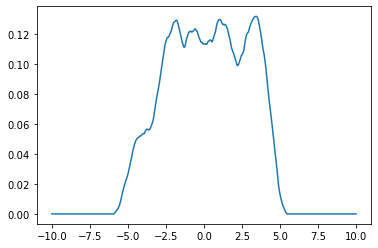

In [8]:
plt.plot(x, parzen_window(uniform_distr))


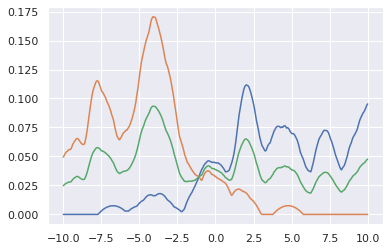

In [23]:
plt.plot(x, parzen_window(normal_distr))
plt.plot(x, parzen_window(normal_distr_1))
plt.plot(x, parzen_window(normal_distr_mixture))

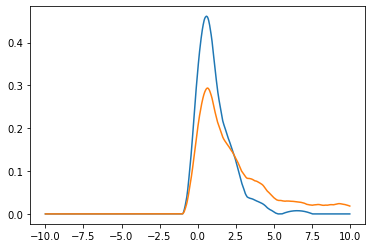

In [10]:
plt.plot(x, parzen_window(exponential_distr))
plt.plot(x, parzen_window(exponential_distr_mixture))

## Визуализация с помощью Seaborn

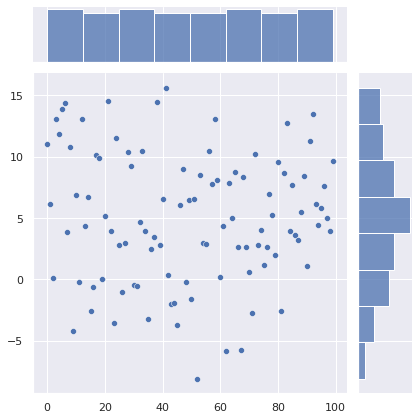

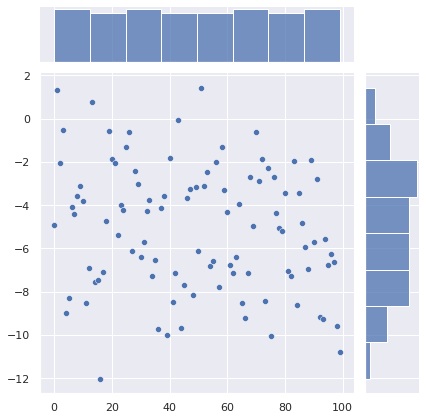

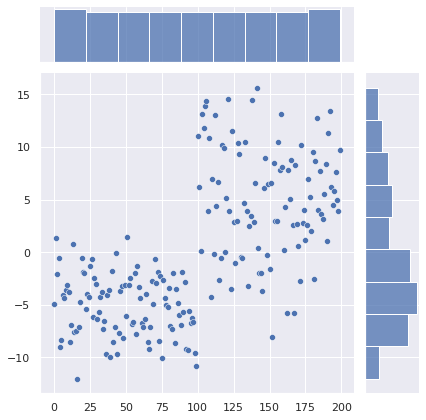

In [60]:
# normal_distr_mixture = pd.merge(pd.DataFrame(normal_distr, np.zeros(normal_distr.shape[0])),
#                         pd.DataFrame(normal_distr_1, np.ones(normal_distr.shape[0])))
# print(normal_distr_mixture)
sns.set_theme()
sns.jointplot(data=normal_distr)
sns.jointplot(data=normal_distr_1)
sns.jointplot(data=)

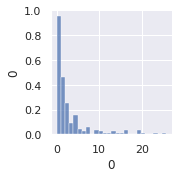

In [21]:
sns.pairplot(data=pd.DataFrame(exponential_distr_mixture))

## EM алгоритм
Все элементы до 100 (Ох на графике) принадлежат к одному распределению, все остальные - ко второму

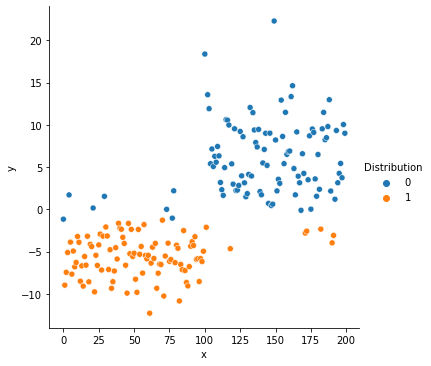

In [5]:
gm = GaussianMixture(n_components=2)
gm_y = gm.fit_predict(pd.DataFrame(normal_distr_mixture, normal_distr_mixture))

sample = pd.DataFrame({"x" : [i for i in range(normal_distr_mixture.shape[0])], 
                       "y": normal_distr_mixture, 
                       "Distribution": gm_y})

sns.relplot(
    data=sample,
    x="x", y="y", 
    hue="Distribution", 
)